# Oscillations - svängningar

## with and without damping

Philipp Schlatter, May 2022

Some preliminaries:

In [1]:
%matplotlib notebook

import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

## 1. Harmonic oscillator

The following equation describes a harmonic oscillator

$$ \ddot{x} + \omega_n^2 x =0 \ .$$

The solution can be obtained by using a harmonic ansatz, and may be written as

$$x(t) = C \cdot \sin ( \omega_n t + \alpha ) \ .$$

Using complex arithmetics the same oscillator can be formulated as 
$$x(t) = Im(\hat X)=Im\left(  C \cdot \exp(i(\omega_n t + \alpha))  \right)$$

with the amplitude $C$, the angular frequency $\omega_n$, the phase shift $\alpha$ and time $t$.

In [2]:
t = np.linspace(0,10,500)

In [3]:
x_ = lambda C, omegan, alpha, t: C*np.sin(omegan*t + alpha)

In [4]:
def update_osc(C, omegan, alpha, tp):
    xx.set_data( t,x_(C, omegan, alpha, t)) 
    xp1.set_data( tp,x_(C, omegan, alpha, tp)) 
    xp0.set_data( C*np.cos(omegan*tp+alpha),C*np.sin(omegan*tp+alpha)) 
    
    la.set_data([0,C*np.cos(alpha)],[0,C*np.sin(alpha)])
    l0.set_data([0,C*np.cos(omegan*tp+alpha)],[0,C*np.sin(omegan*tp+alpha)])
    circle0.set_radius(C)

    q1.set_data([C*np.cos(omegan*tp+alpha),C*np.cos(omegan*tp+alpha)],[0,C*np.sin(omegan*tp+alpha)])
    q2.set_data([tp,tp],[0,C*np.sin(omegan*tp+alpha)])
    q3.set_data([C*np.cos(alpha),C*np.cos(alpha)],[0,C*np.sin(alpha)])
    q4.set_data([0,0],[0,C*np.sin(alpha)])   

<IPython.core.display.Javascript object>


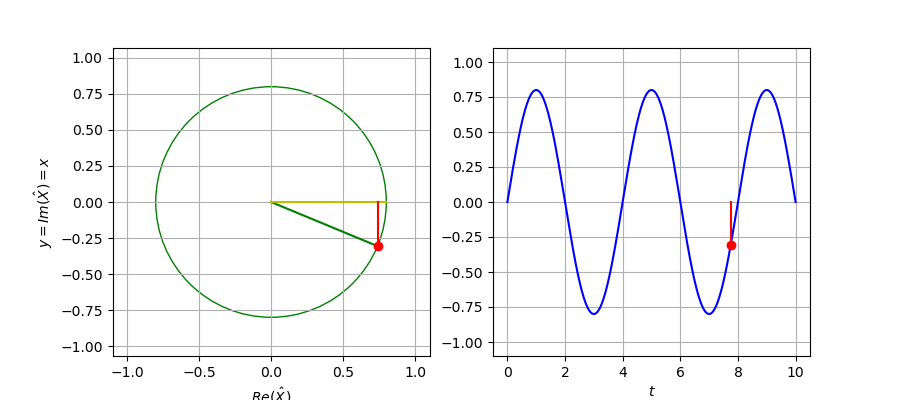

interactive(children=(FloatSlider(value=0.8, description='amplitude $C$', layout=Layout(width='800px'), max=1.…

In [5]:
# set up plot
fig, axs = plt.subplots(1,2,figsize=(9,4))
ax0 = axs[0]
ax1 = axs[1]
ax1.set_ylim([-1.1, 1.1])
ax1.set_xlim([-0.5, 10.5])
ax1.grid(True)
ax1.set_xlabel(r'$t$')
ax0.set_ylabel(r'$y=Im(\hat X)=x$')
ax0.set_xlabel(r'$Re(\hat X)$')

ax0.set_ylim([-1.1, 1.1])
ax0.set_xlim([-1.1, 1.1])
ax0.grid(True)
ax0.axis('equal')

xx, =ax1.plot(1,1, color='b',label='trajectory')
xp1, =ax1.plot(1,1, marker='o',color='r',label='t')

l0, = ax0.plot(1,1,color='g')
la, = ax0.plot(1,1,color='y')
xp0, =ax0.plot(1,1, marker='o',color='r',label='t')
circle0 = plt.Circle((0,0),color='g',radius=1,fill=False)
ax0.add_patch(circle0)

q1, = ax0.plot(1,1,color='r')
q2, = ax1.plot(1,1,color='r')
q3, = ax0.plot(1,1,color='y')
q4, = ax1.plot(1,1,color='y')

# ax1.legend(loc='upper right')

ll = widgets.Layout(width='800px');

widgets.interact(update_osc, \
         C=widgets.FloatSlider(min=0,max=1,step=0.01,value=0.8, description='amplitude $C$',layout=ll), \
         omegan=widgets.FloatSlider(min=0,max=10,step=0.05,value=np.pi/2, description='frequency $\omega_n$',layout=ll), \
         alpha=widgets.FloatSlider(min=-np.pi,max=np.pi,step=np.pi/200,value=0., description='phase shift $\\alpha$',layout=ll), \
         tp=widgets.FloatSlider(min=0,max=10,step=0.01,value=0, description='time $t$',layout=ll) );

## 2. Free damped oscillations

Free damped oscillations are described by the differential equation

$$ \ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = 0 \ .$$

The value of the damping $\zeta$ determines whether we speak about strong ($\zeta>1$), critical ($\zeta=1$) or weak damping ($\zeta<1$).

The following figure shows the solution $x(t)$ for specific initial conditions for the position $x_0=x(0)$ and velocity $v_0=v(0)$.

In [6]:
def damped(x,v,omegan,zeta):
    """Simple Euler-forward integrator for the damped oscillator"""
    dt=0.01 
    t=0; xdata=[x]; tdata=[0]
    while t<=10: 
        a=-2*omegan*zeta*v-omegan**2*x #calculate acceleration
        v=v+a*dt 
        x=x+v*dt
        t=t+dt 
        xdata.append(x); tdata.append(t) 
    return xdata,tdata

def update_damp(x,v,omegan,zeta):
    [xdata,tdata] = damped(x,v,omegan,zeta)
    xx.set_data(tdata,xdata) 

<IPython.core.display.Javascript object>


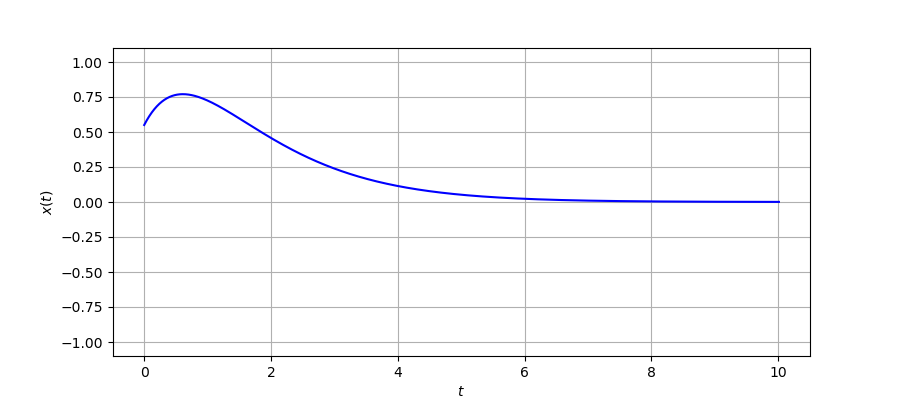

interactive(children=(FloatSlider(value=0.8, description='$x_0$', layout=Layout(width='800px'), max=1.0, min=-…

In [10]:
# set up plot
fig, ax = plt.subplots(1,figsize=(9,4))
ax.grid(True)
xx, =ax.plot(1,1, color='b',label='trajectory')
ax.set_ylim([-1.1, 1.1])
ax.set_xlim([-0.5, 10.5])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x(t)$')

ll = widgets.Layout(width='800px');

widgets.interact(update_damp, \
         x=widgets.FloatSlider(min=-1,max=1,step=0.01,value=0.8, description='$x_0$',layout=ll), \
         v=widgets.FloatSlider(min=-50,max=50,step=0.01,value=0, description='$v_0$',layout=ll), \
         omegan=widgets.FloatSlider(min=0,max=10,step=0.01,value=1, description='$\\omega_n$',layout=ll), \
         zeta=widgets.FloatSlider(min=0,max=5,step=0.01,value=0, description='$\zeta$',layout=ll) );